In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

**Load Iris dataset**

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**GroupBy and Aggregate**

In [10]:
grouped = df.groupby('species').agg(
    mean_sepal_length=('sepal_length', 'mean'),
    mean_sepal_width=('sepal_width', 'mean'),
    mean_petal_length=('petal_length', 'mean'),
    mean_petal_width=('petal_width', 'mean'),
    count=('species', 'count')
)
# print("GroupBy with Aggregation:\n", grouped)
grouped

C:\Users\abdul.samad\AppData\Local\Temp\ipykernel_15244\2712055736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('species').agg(


,mean_sepal_length,mean_sepal_width,mean_petal_length,mean_petal_width,count
species,,,,,
setosa,5.006,3.428,1.462,0.246,50
versicolor,5.936,2.770,4.260,1.326,50
virginica,6.588,2.974,5.552,2.026,50


**Pivot Table**

In [11]:
df['sepal_width_bins'] = pd.cut(df['sepal_width'], bins=3, labels=['low', 'medium', 'high'])
pivot_table = df.pivot_table(
    values=['sepal_length', 'petal_length'],
    index='species',
    columns='sepal_width_bins',
    aggfunc='mean'
)
pivot_table

C:\Users\abdul.samad\AppData\Local\Temp\ipykernel_15244\2463097532.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


petal_length                     sepal_length            \
sepal_width_bins          low    medium      high          low    medium   
species                                                                    
setosa               1.300000  1.444444  1.523077     4.500000  4.888889   
versicolor           4.077778  4.473913       NaN     5.729630  6.178261   
virginica            5.373684  5.600000  6.550000     6.289474  6.700000   

                            
sepal_width_bins      high  
species                     
setosa            5.369231  
versicolor             NaN  
virginica         7.800000

**Visualization**
**Bar Chart for GroupBy Results**

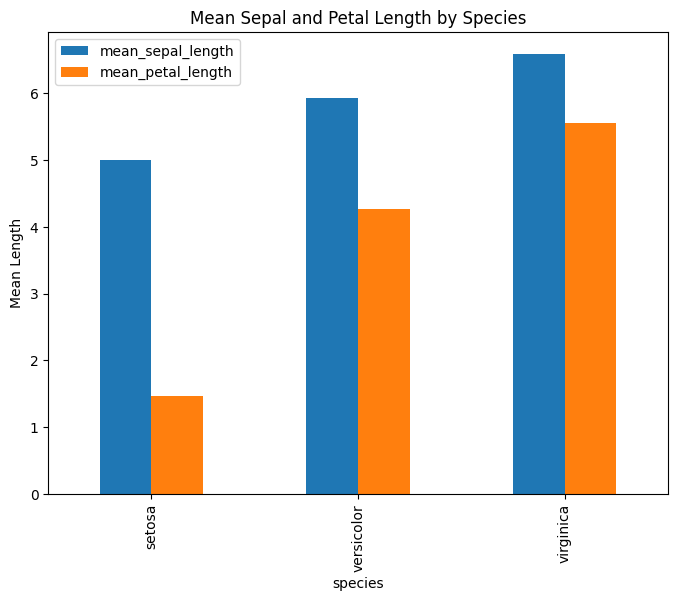

In [12]:
grouped[['mean_sepal_length', 'mean_petal_length']].plot(kind='bar', figsize=(8, 6))
plt.title("Mean Sepal and Petal Length by Species")
plt.ylabel("Mean Length")
plt.show()

**Heatmap for Pivot Table**

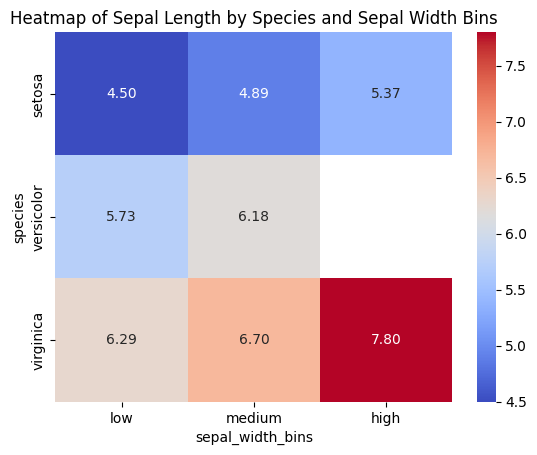

In [15]:
sns.heatmap(pivot_table['sepal_length'], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Sepal Length by Species and Sepal Width Bins")
plt.show()